In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sns_df.csv', sep=',')#,usecols=['Acquisition_Time','Hospital','Urgency_Type','Service','Emergency_Stage','Waiting_Time','People_Waiting','H_Name'])
df

,Unnamed: 0,Acquisition_Time,Hospital,Urgency_Type,Service,Emergency_Stage,Waiting_Time,People_Waiting,H_Name
0,0,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,4,17,0,S Jose
1,1,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,3,34,0,S Jose
2,2,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Cirurgia Geral,3,6,0,S Jose
3,3,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Oftalmologia,3,5,0,S Jose
4,4,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,2,309,8,S Jose
...,...,...,...,...,...,...,...,...,...
1603379,1603417,2019-04-29 23:59:41,218,Urgncia Central,Medicina,4,13,0,Santa Maria
1603380,1603418,2019-04-29 23:59:41,218,Urgncia Central,Cirurgia,3,10,0,Santa Maria
1603381,1603419,2019-04-29 23:59:41,218,Urgncia Central,Medicina,3,53,13,Santa Maria
1603382,1603420,2019-04-29 23:59:41,218,Urgncia Central,Cirurgia,2,52,1,Santa Maria


### Selecting only Hospital Santa Maria

In [6]:
new_df=df.loc[df['H_Name']=='Santa Maria']
new_df.reset_index(drop=True, inplace=True)

In [7]:
new_df=new_df.iloc[:,1:]
new_df

,Acquisition_Time,Hospital,Urgency_Type,Service,Emergency_Stage,Waiting_Time,People_Waiting,H_Name
0,2017-11-15 00:02:22,218,Urgncia Central,Cirurgia,4,16,0,Santa Maria
1,2017-11-15 00:02:22,218,Urgncia Central,Medicina,4,12,0,Santa Maria
2,2017-11-15 00:02:22,218,Urgncia Central,Cirurgia,3,26,1,Santa Maria
3,2017-11-15 00:02:22,218,Urgncia Central,Medicina,3,33,1,Santa Maria
4,2017-11-15 00:02:22,218,Urgncia Central,Cirurgia,2,30,1,Santa Maria
...,...,...,...,...,...,...,...,...
395853,2019-04-29 23:59:41,218,Urgncia Central,Medicina,4,13,0,Santa Maria
395854,2019-04-29 23:59:41,218,Urgncia Central,Cirurgia,3,10,0,Santa Maria
395855,2019-04-29 23:59:41,218,Urgncia Central,Medicina,3,53,13,Santa Maria
395856,2019-04-29 23:59:41,218,Urgncia Central,Cirurgia,2,52,1,Santa Maria


### Checking data types

To explore data, the info() method may be more useful as it provides RangeIndex, total columns, non-null count, dtypes, and memory usage.

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395858 entries, 0 to 395857
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Acquisition_Time  395858 non-null  object
 1   Hospital          395858 non-null  int64 
 2   Urgency_Type      395858 non-null  object
 3   Service           395858 non-null  object
 4   Emergency_Stage   395858 non-null  int64 
 5   Waiting_Time      395858 non-null  int64 
 6   People_Waiting    395858 non-null  int64 
 7   H_Name            395858 non-null  object
dtypes: int64(4), object(4)
memory usage: 24.2+ MB


### Converting objects to string/ datetime

In [9]:
new_df['Acquisition_Time'] = pd.to_datetime(new_df['Acquisition_Time'])
new_df['Urgency_Type'] = new_df['Urgency_Type'].astype('string')
new_df['Service'] = new_df['Service'].astype('string')
new_df['H_Name'] = new_df['H_Name'].astype('string')

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395858 entries, 0 to 395857
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Acquisition_Time  395858 non-null  datetime64[ns]
 1   Hospital          395858 non-null  int64         
 2   Urgency_Type      395858 non-null  string        
 3   Service           395858 non-null  string        
 4   Emergency_Stage   395858 non-null  int64         
 5   Waiting_Time      395858 non-null  int64         
 6   People_Waiting    395858 non-null  int64         
 7   H_Name            395858 non-null  string        
dtypes: datetime64[ns](1), int64(4), string(3)
memory usage: 24.2 MB


### EDA

**Target variable**: Waiting_Time

**Features**: Emergency_Stage; Acquisition_Time; ?People_Waiting?

In [11]:
new_df2=new_df[["Service", 'Emergency_Stage','Acquisition_Time','People_Waiting','Waiting_Time']].copy()
df_ComLag = new_df2.copy()
df_ComLag["lag_Waiting_Time_30_mn"] = 0

In [12]:
new_df2.describe()

,Emergency_Stage,People_Waiting,Waiting_Time
count,395858.000000,395858.000000,395858.000000
mean,2.601754,4.148808,69.607175
std,0.960084,6.291929,75.216639
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000
50%,3.000000,2.000000,45.000000
75%,3.000000,5.000000,85.000000
max,5.000000,55.000000,599.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


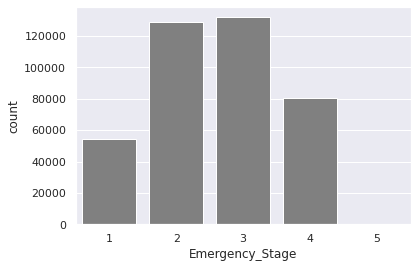

In [13]:
sns.set()
sns.countplot(new_df2['Emergency_Stage'], color='gray')

In [ ]:
stages = np.arange(1,6,1)
for s in stages:
    print('Nível de triagem ',s,':',len(new_df[new_df['Emergency_Stage']==s]))

Nível de triagem  1 : 54478
Nível de triagem  2 : 129118
Nível de triagem  3 : 131944
Nível de triagem  4 : 80211
Nível de triagem  5 : 107


Rather than using the y-axis to represent the two categories, let’s use two different colors. That means that we can use the y-axis to represent counts rather than trying to discern this information from the density of dots.

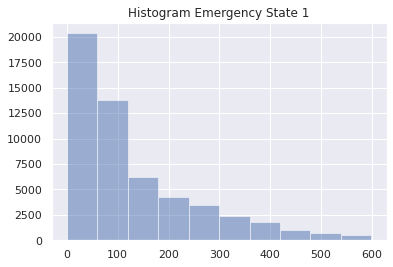

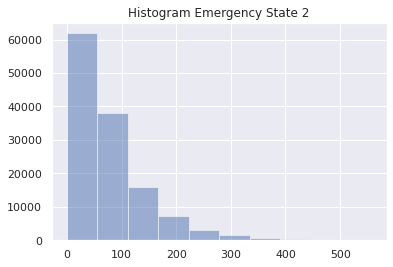

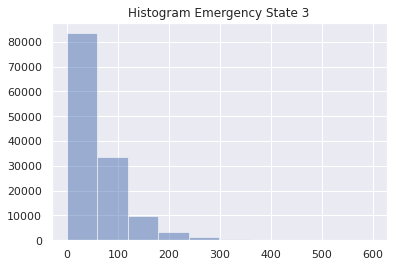

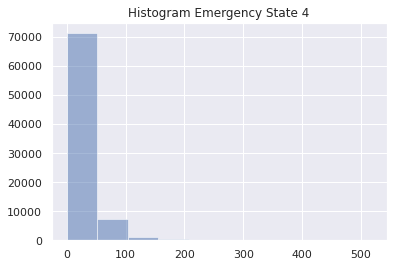

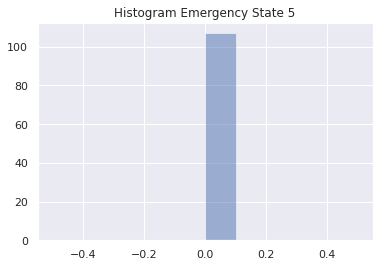

In [ ]:
stages = np.arange(1,6,1)
for s in stages:
    plt.hist(new_df2[new_df2['Emergency_Stage']==s]["Waiting_Time"],alpha=0.5)
    plt.title(label='Histogram Emergency State '+str(s))
    plt.show()

This is showing largely the same information as the histograms, except that it’s a density estimate (estimate of the probability density function) rather than a count across bins. Seaborn has nice built-in functionality for this.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


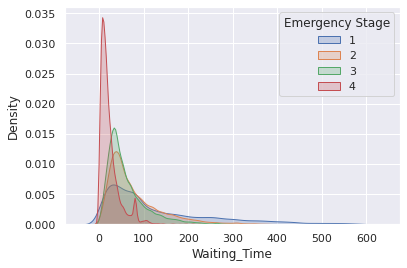

In [ ]:
stages = np.arange(1,6,1)
for s in stages:
    sns.kdeplot(new_df2[new_df2['Emergency_Stage']==s]["Waiting_Time"], shade=True, palette=("Accent"),label=s)
    plt.legend(title='Emergency Stage', labels=stages)

In [ ]:
#waiting time
waitingTime = new_df2.iloc[:,-1]
print(waitingTime)
#people waiting
peopleWaiting = new_df2.iloc[:,-2]

0          16
1          12
2          26
3          33
4          30
         ... 
395853     13
395854     10
395855     53
395856     52
395857    137
Name: Waiting_Time, Length: 395858, dtype: int64


## Histograms (people waiting + waiting time) and Scatter Plot (people waiting vs waiting time)

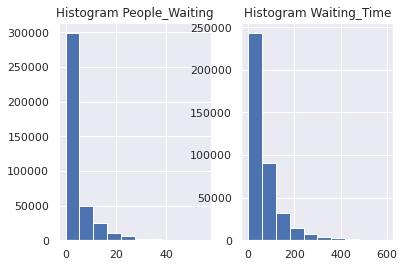

Text(0, 0.5, 'Waiting_Time')

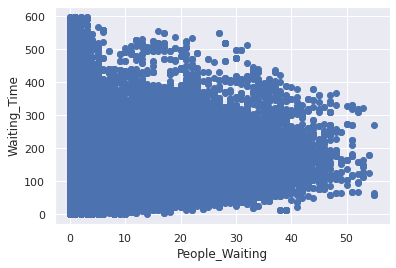

In [14]:

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(new_df2['People_Waiting'])
plt.title("Histogram People_Waiting")
plt.subplot(1, 2, 2) # index 2
plt.hist(new_df2['Waiting_Time'])
plt.title("Histogram Waiting_Time")

plt.show()
plt.scatter(x='People_Waiting',y='Waiting_Time',data=new_df)
plt.xlabel('People_Waiting')
plt.ylabel('Waiting_Time')

## Drift para tempo de espera

Um dos aspetos mais importantes a estudar nos dados que temos é o concept drift. Este é um dos problemas mais comúns no contexto de big data por nunca se saber bem qual a variação da distribuição que os dados seguem, se se altera ao longo do tempo e caso aconteça, de que forma ocorre. Normalmente, no contexto clássico de Aprendizagem Automática existem duas ou três fases (dependendo se temos validação ou não para escolhermos os hiperparâmetros de um modelo). Estas duas são o treino do modelo e a previsão de exemplos não antes vistos. No entanto, no contexto de streams esta abordagem apresenta algumas dificuldades precisamente devido ao concept drift. É preciso ter em conta se existe sequer ou não, perceber como ocorre e a sua frequência e, no caso de existir, perceber como devemos proceder para ter em conta no treino do modelo.

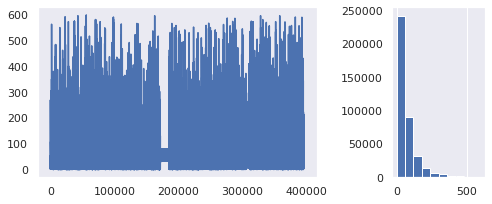

In [ ]:
## Tutorial from river.xyz

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

#Calcular o drift no tempo de espera
stream = waitingTime

# Auxiliary function to plot the data
def plot_data(stream, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(stream, label=r'$stream$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(stream)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Change detected at index 49151
Change detected at index 75743
Change detected at index 91103
Change detected at index 94175
Change detected at index 104415
Change detected at index 180991
Change detected at index 190207
Change detected at index 315135


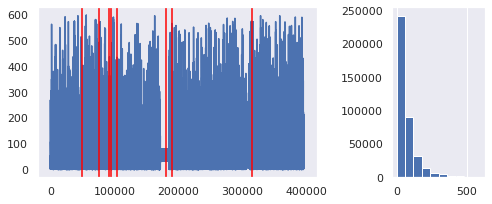

In [ ]:
!pip install river
from river import drift

drift_detector = drift.ADWIN(delta=1e-90)
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.change_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        drift_detector.reset()   # As a best practice, we reset the detector

plot_data(stream, drifts)

Analisaremos agora o Concept Drift relativamente ao tempo de espera em minutos pelas pessoas. Como podemos ver pelo gráfico acima, foram detetados alguns momentos em que existiu drift.
Utilizaremos o ADWIN para os detetar por nós. Esta ferramenta não necessita que definimos o tamanho das janelas apriori, apenas precisa de um valor representante de uma janela suficientemente grande para fazer a análise. Este examinará todos os possiveis valores de corte dessa janela e calcula valores apropriados para as janelas mis pequenas tendo em conta os dados históricos caso detete que haja diferencas significativas (entre os dados historicos e os atuais), o que é representante de haver concept drift. De uma forma mais formal, este usa a seguinte estatística de teste
θ_ADWIN = |𝝁_Hist - 𝝁_New|
O corte ótimo é encontrado quando esta diferença excede um limiar definido por nós (no parâmetro delta).
Como podemos ver pelo gráfico, existe algum delay entre o momento em que ocorre o drift e o momento em que é detetado. Isto é facilmente visível no meio do gráfico em que as duas deteções estão ligeiramente desfasadas do gráfico que sobrepõem. Este concept drift refere-se a um menor tempo de espera comparativamente aos restantes dias. 

Relativamente ao tipo de concept drift presente neste caso, parece-nos ser do tipo "Sudden drift" pela distribuição mudar drasticamente a meio comparativamente ao resto dos dados. 

## Concept drift people waiting

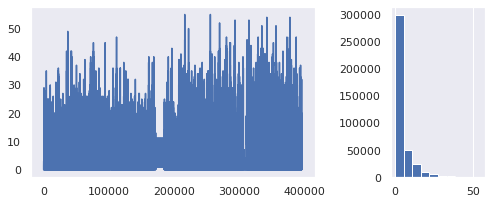

In [ ]:
## Tutorial from river.xyz

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

#Calcular o drift no tempo de espera
stream = peopleWaiting

# Auxiliary function to plot the data
def plot_data(stream, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(stream, label=r'$stream$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(stream)

Change detected at index 13823
Change detected at index 43231
Change detected at index 45407
Change detected at index 55135
Change detected at index 103647
Change detected at index 123583
Change detected at index 180927
Change detected at index 188351
Change detected at index 319519


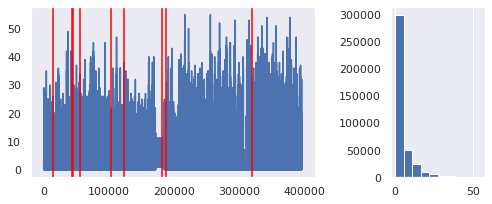

In [ ]:
#!pip install river
from river import drift
from river.linear_model import LogisticRegression
from river.naive_bayes import MultinomialNB
from river.feature_extraction import BagOfWords,TFIDF

drift_detector = drift.ADWIN(delta=1e-70)
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.change_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        drift_detector.reset()   # As a best practice, we reset the detector

plot_data(stream, drifts)

In [ ]:
Lag_value = 3
for em in range(1,6):
  df_ComLag.loc[(df_ComLag['Service']=="Cirurgia") & (df_ComLag['Emergency_Stage']==em),'lag_Waiting_Time_30_mn'] = df_ComLag[(df_ComLag['Service']=="Cirurgia") & (df_ComLag['Emergency_Stage']==em) ].Waiting_Time.shift(Lag_value)
  df_ComLag.loc[(df_ComLag['Service']=="Medicina") & (df_ComLag['Emergency_Stage']==em),'lag_Waiting_Time_30_mn'] = df_ComLag[(df_ComLag['Service']=="Medicina") & (df_ComLag['Emergency_Stage']==em) ].Waiting_Time.shift(Lag_value)
df3 = df_ComLag.dropna().copy()
df3.sample(10)

df3[df3['Service']=='Aguarda Balcao Trauma']
services_to_keep = ['Cirurgia', 'Medicina']
df4 = df3.query("Service in @services_to_keep")
df4[df4['Service']=='Aguarda Balcao Trauma']


,Service,Emergency_Stage,Acquisition_Time,People_Waiting,Waiting_Time,lag_Waiting_Time_30_mn


In [ ]:
y = df4.pop('Waiting_Time')
y

21         16
22         11
23         27
24         28
25         34
         ... 
395853     13
395854     10
395855     53
395856     52
395857    137
Name: Waiting_Time, Length: 395723, dtype: int64

In [ ]:
#Modelo 1
#Modelo linear com lag como feature

from river import datasets
from pprint import pprint
from river import compose
from river import linear_model
from river import metrics
from river import evaluate
from river import preprocessing
from river import optim
from river import feature_extraction
from river import stats
from river import ensemble
from river import neighbors, stream
import datetime as dt



model = compose.Select('People_Waiting', "lag_Waiting_Time_30_mn", "Emergency_Stage") # Select only numeric features.
model |= preprocessing.StandardScaler()
model |= linear_model.LinearRegression(optimizer=optim.SGD(0.001)) # <-- Optimizer is Stochastic Gradient Descent. LR=1e-3

for xi, yi in stream.iter_pandas(df4, y):
  model.learn_one(xi, yi)


metric = metrics.MAE()
X_y = stream.iter_pandas(df4, y)
evaluate.progressive_val_score(X_y, model, metric, print_every=20_000)

[20,000] MAE: 12.268319
[40,000] MAE: 12.732713
[60,000] MAE: 13.286291
[80,000] MAE: 14.177836
[100,000] MAE: 14.283199
[120,000] MAE: 14.506781
[140,000] MAE: 14.898752
[160,000] MAE: 15.217845
[180,000] MAE: 14.723819
[200,000] MAE: 14.516347
[220,000] MAE: 14.680364
[240,000] MAE: 14.8423
[260,000] MAE: 15.091538
[280,000] MAE: 15.084346
[300,000] MAE: 15.17991
[320,000] MAE: 15.110015
[340,000] MAE: 15.414442
[360,000] MAE: 15.636057
[380,000] MAE: 15.831083


MAE: 16.239019

In [ ]:
#Modelo 2

from river import tree, metrics, preprocessing, stream

model = (preprocessing.StandardScaler() |tree.HoeffdingAdaptiveTreeRegressor(grace_period=5, leaf_prediction='adaptive',model_selector_decay=0.3, max_depth= 2))

new_df3 = df4.copy()
#new_df3["Acquisition_Time"] = pd.to_datetime(new_df3["Acquisition_Time"]).map(pd.Timestamp.timestamp)
new_df3.drop(columns = "Service", inplace=True, axis=1)
new_df3.drop(columns = "Acquisition_Time", inplace=True, axis=1)
y_preds = []
for xi, yi in stream.iter_pandas(new_df3, y):
  model.learn_one(xi, yi)
  y_preds.append(model.predict_one(xi))

metric = metrics.MAE()

X_y = stream.iter_pandas(new_df3, y)
evaluate.progressive_val_score(X_y, model, metric, print_every=20_000)

[20,000] MAE: 11.815252
[40,000] MAE: 12.470233
[60,000] MAE: 12.809159
[80,000] MAE: 13.507419
[100,000] MAE: 13.621995
[120,000] MAE: 13.850813
[140,000] MAE: 14.230812
[160,000] MAE: 14.50991
[180,000] MAE: 13.955984
[200,000] MAE: 13.777525
[220,000] MAE: 13.943967
[240,000] MAE: 14.13235
[260,000] MAE: 14.37512
[280,000] MAE: 14.36877
[300,000] MAE: 14.430646
[320,000] MAE: 14.358725
[340,000] MAE: 14.643581
[360,000] MAE: 14.868762
[380,000] MAE: 15.047895


MAE: 15.435516

In [ ]:
#Modelo 3
#Mais simples simples mas erro mais baixo 
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from river import datasets
from pprint import pprint
from river import compose
from river import linear_model
from river import metrics
from river import evaluate, stream
from river import preprocessing
from river import optim
from river import feature_extraction
from river import stats
from river import ensemble
from river import neighbors
import datetime as dt

for xi, yi in stream.iter_pandas(new_df2, y):
    print(xi)
    print(f'Waiting Time: {yi}')
    print(f'Number of features: {len(xi)}')
    break # exit after the first call 

def get_hour_and_weekday(x):
    x['weekday'] = (x['Acquisition_Time'].weekday() < 6) # Mon:0,Tue:1,...,Sat:6,Sun:7
    x['hour'] = x['Acquisition_Time'].hour
    #x["peopleWaiting"] = float(x['People_Waiting'])
    return x

#waiting time é a media dos tempos de espera das ultimas 2 horas
model = compose.Select('People_Waiting', "lag_Waiting_Time_30_mn", "Emergency_Stage")
model += (get_hour_and_weekday |
    feature_extraction.TargetAgg(by='hour', how=stats.Mean())) ## Faltava tudo para a frente desta linha
model |= preprocessing.StandardScaler()
model |= linear_model.LinearRegression(optimizer=optim.SGD(0.001))
#model |= tree.HoeffdingAdaptiveTreeRegressor(grace_period=5, leaf_prediction='adaptive',model_selector_decay=0.3, max_depth= 2)

metric = metrics.MAE()

evaluate.progressive_val_score(
    dataset= stream.iter_pandas(df4, y),
    model=model,
    metric=metric,
    moment='Acquisition_Time',
    delay=dt.timedelta(minutes=30),
    print_every=20_000
)

{'Service': 'Cirurgia', 'Emergency_Stage': 4, 'Acquisition_Time': Timestamp('2017-11-15 00:02:22'), 'People_Waiting': 0, 'Waiting_Time': 16}
Waiting Time: 16
Number of features: 5
[20,000] MAE: 13.495309
[40,000] MAE: 14.123071
[60,000] MAE: 14.612844
[80,000] MAE: 15.454789
[100,000] MAE: 15.455638
[120,000] MAE: 15.691451
[140,000] MAE: 16.069853
[160,000] MAE: 16.365152
[180,000] MAE: 15.75212
[200,000] MAE: 15.596616
[220,000] MAE: 15.824711
[240,000] MAE: 16.038936
[260,000] MAE: 16.321425
[280,000] MAE: 16.30754
[300,000] MAE: 16.401479
[320,000] MAE: 16.349563
[340,000] MAE: 16.684346
[360,000] MAE: 16.943319
[380,000] MAE: 17.157749


MAE: 17.585999

In [ ]:
#Modelo 4
#Mais complexo mas erro mais alto 
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from river import datasets
from pprint import pprint
from river import compose
from river import linear_model
from river import metrics
from river import evaluate, stream
from river import preprocessing
from river import optim
from river import feature_extraction
from river import stats
from river import ensemble
from river import neighbors
import datetime as dt

from river import tree, metrics, preprocessing, stream

for xi, yi in stream.iter_pandas(new_df2, y):
    print(xi)
    print(f'Waiting Time: {yi}')
    print(f'Number of features: {len(xi)}')
    break # exit after the first call 

def get_hour_and_weekday(x):
    x['weekday'] = (x['Acquisition_Time'].weekday() < 6) # Mon:0,Tue:1,...,Sat:6,Sun:7
    x['hour'] = x['Acquisition_Time'].hour
    return x

#ver se podemos usar emergency stage
model = compose.Select('People_Waiting', "lag_Waiting_Time_30_mn", "Emergency_Stage")
model += (get_hour_and_weekday |
    feature_extraction.TargetAgg(by='hour', how=stats.Mean()))
model |= preprocessing.StandardScaler()
model |= ensemble.EWARegressor([ 
    linear_model.LinearRegression(optim.SGD(0.0001)), 
    linear_model.LinearRegression(optim.RMSProp()),
    linear_model.LinearRegression(optim.Adam(0.0001)),
    tree.HoeffdingAdaptiveTreeRegressor(grace_period=5, adwin_confidence=1e-80, leaf_prediction='adaptive',model_selector_decay=0.3, max_depth= 2),
])


metric = metrics.MAE()
evaluate.progressive_val_score(
    dataset= stream.iter_pandas(df4, y),
    model=model,
    metric=metric,
    moment='Acquisition_Time',
    delay=dt.timedelta(minutes=100),
    print_every=20_000
)

{'Service': 'Cirurgia', 'Emergency_Stage': 4, 'Acquisition_Time': Timestamp('2017-11-15 00:02:22'), 'People_Waiting': 0, 'Waiting_Time': 16}
Waiting Time: 16
Number of features: 5
[20,000] MAE: 56.4166
[40,000] MAE: 62.559175
[60,000] MAE: 63.4244
[80,000] MAE: 66.7776
[100,000] MAE: 67.14619
[120,000] MAE: 66.472525
[140,000] MAE: 66.294857
[160,000] MAE: 65.949156
[180,000] MAE: 65.149583
[200,000] MAE: 64.954845
[220,000] MAE: 65.087832
[240,000] MAE: 65.304767
[260,000] MAE: 65.864504
[280,000] MAE: 66.495186
[300,000] MAE: 67.153937
[320,000] MAE: 68.052522
[340,000] MAE: 68.798412
[360,000] MAE: 69.400336
[380,000] MAE: 69.774124


MAE: 69.618187